In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsbombpy import sb
import re
import os
import warnings
import numpy as np
from itertools import combinations
import random
from gudhi.hera import wasserstein_distance
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning)

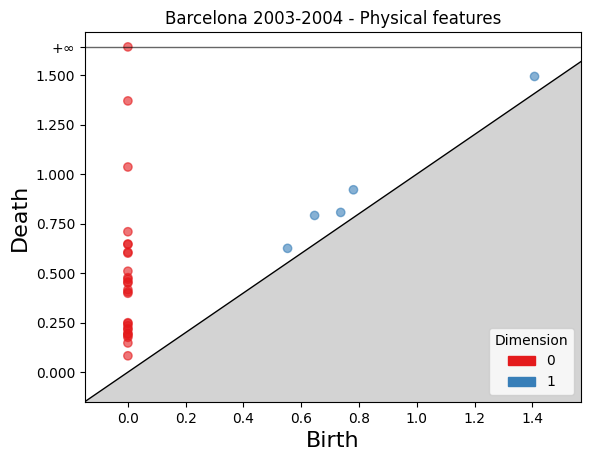

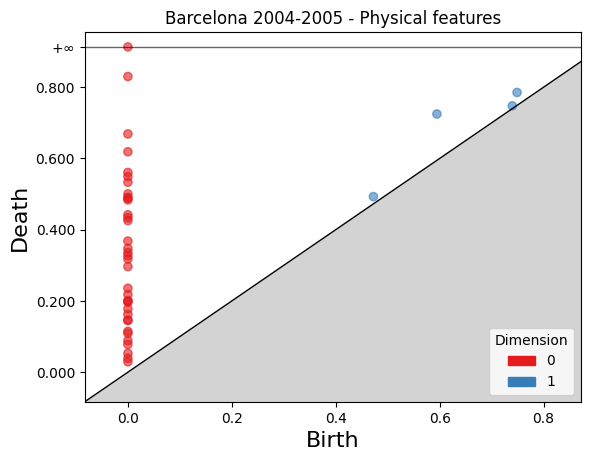

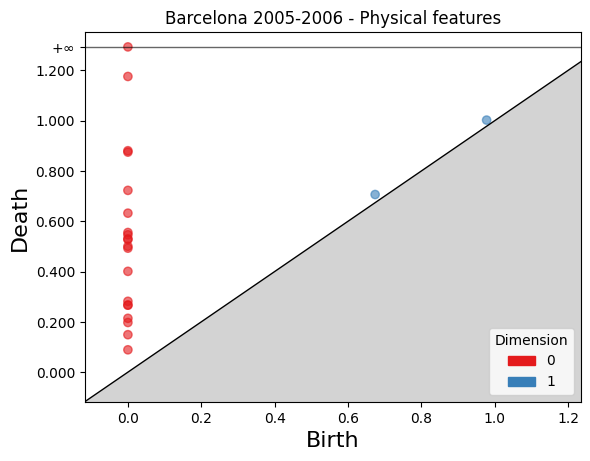

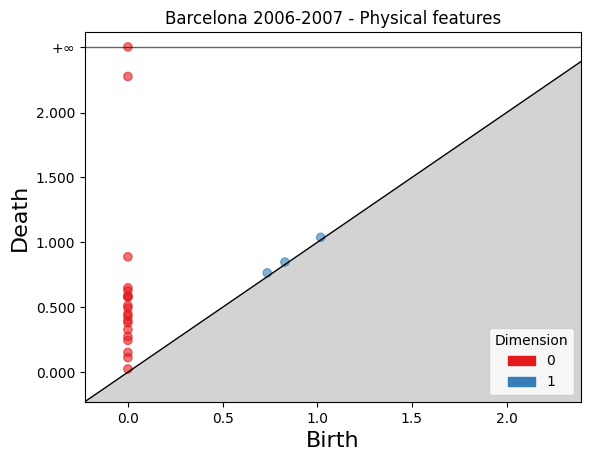

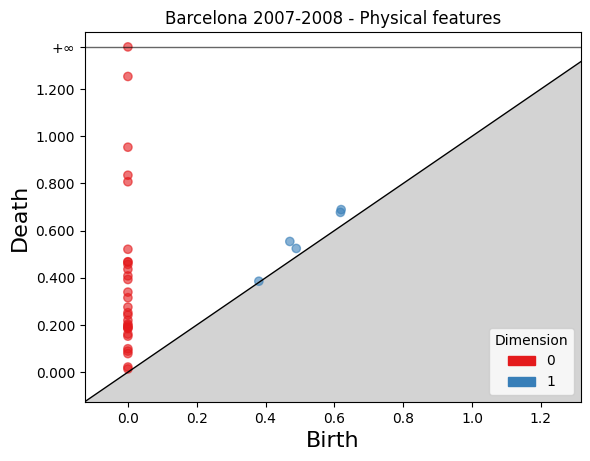

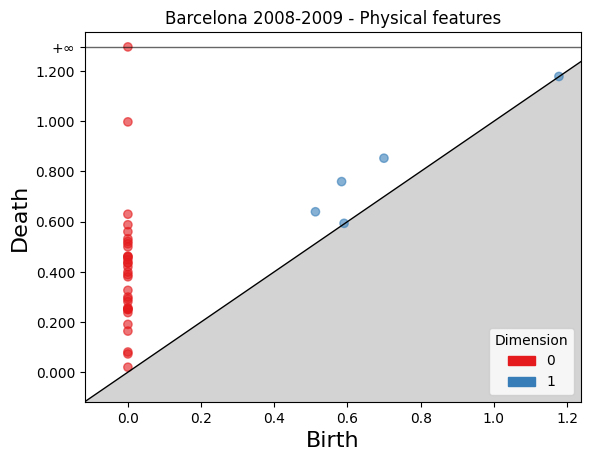

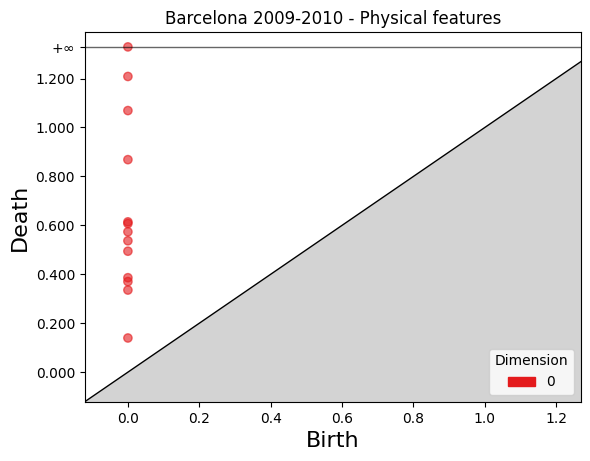

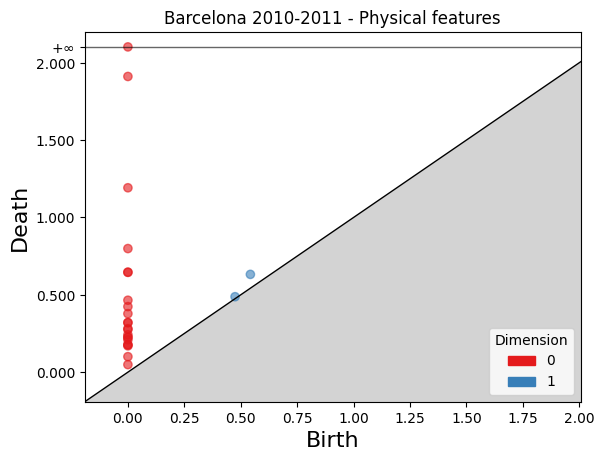

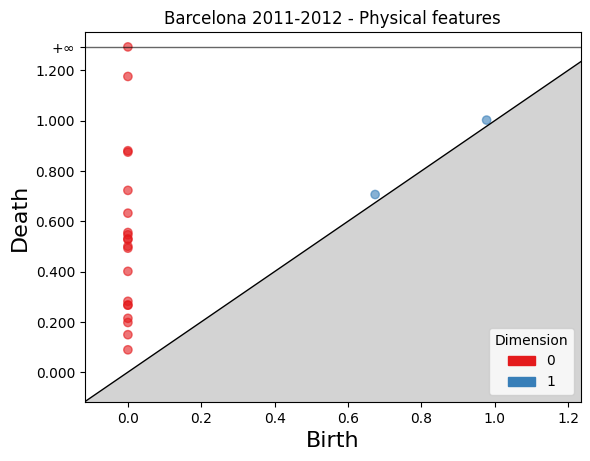

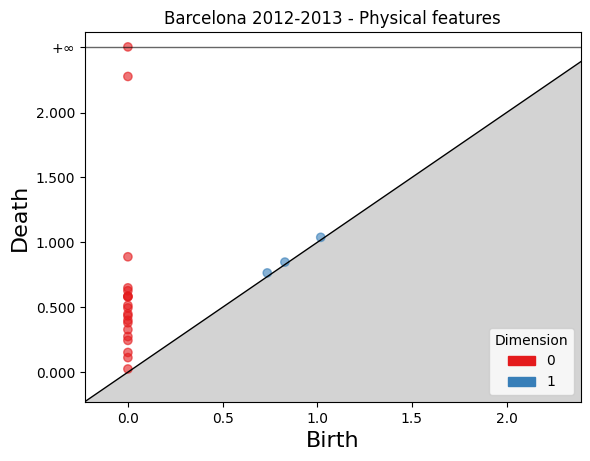

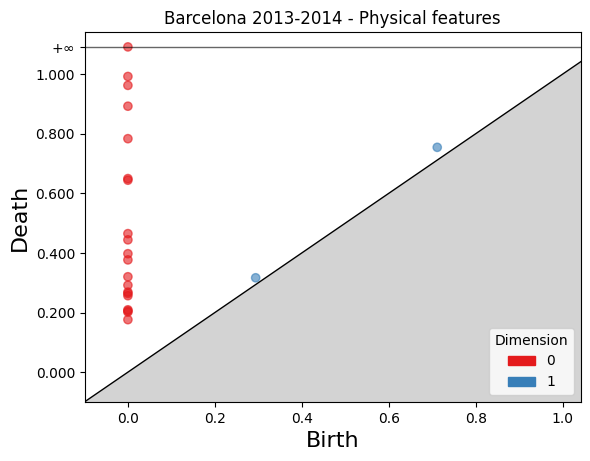

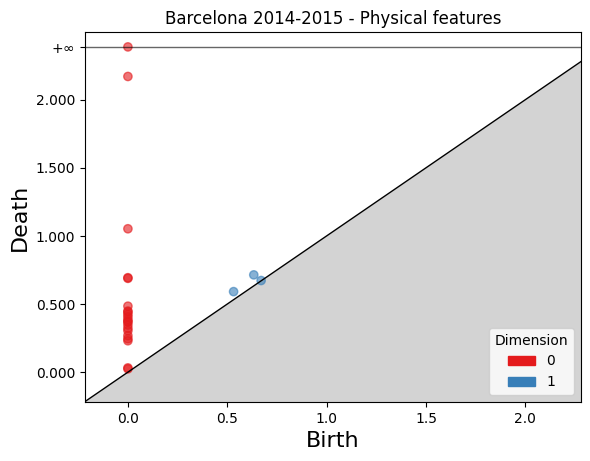

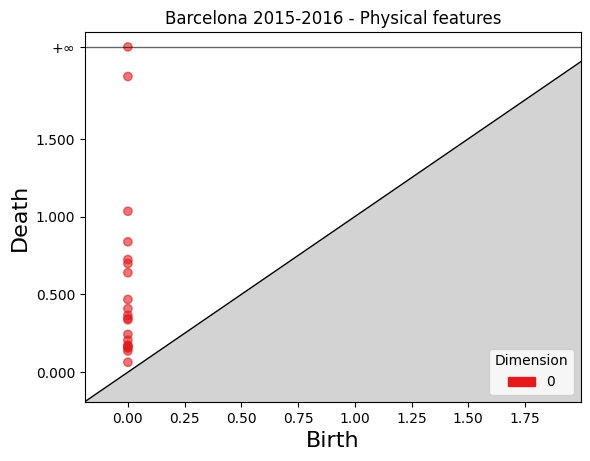

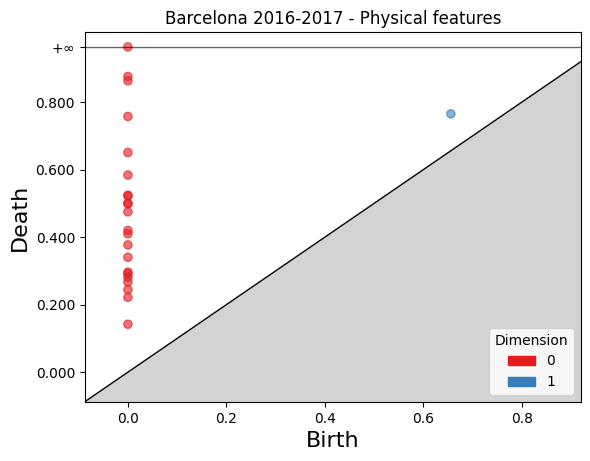

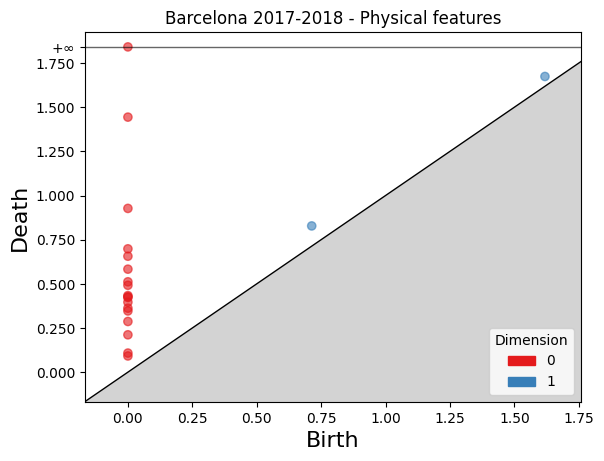

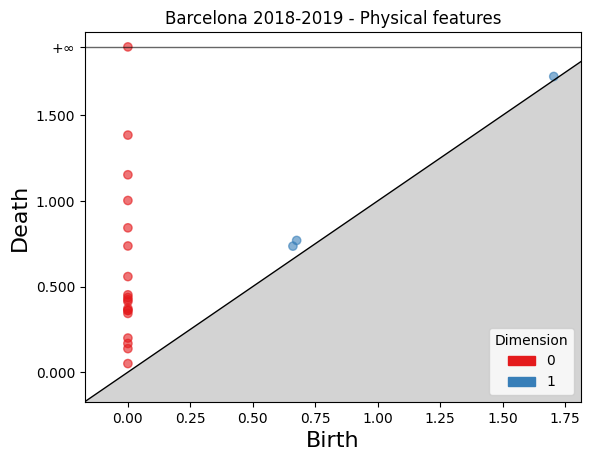

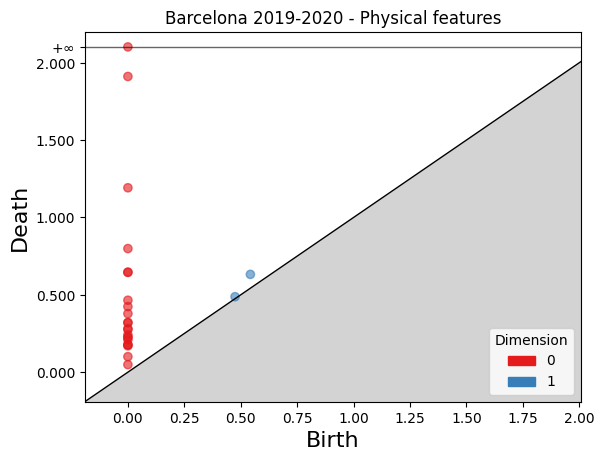

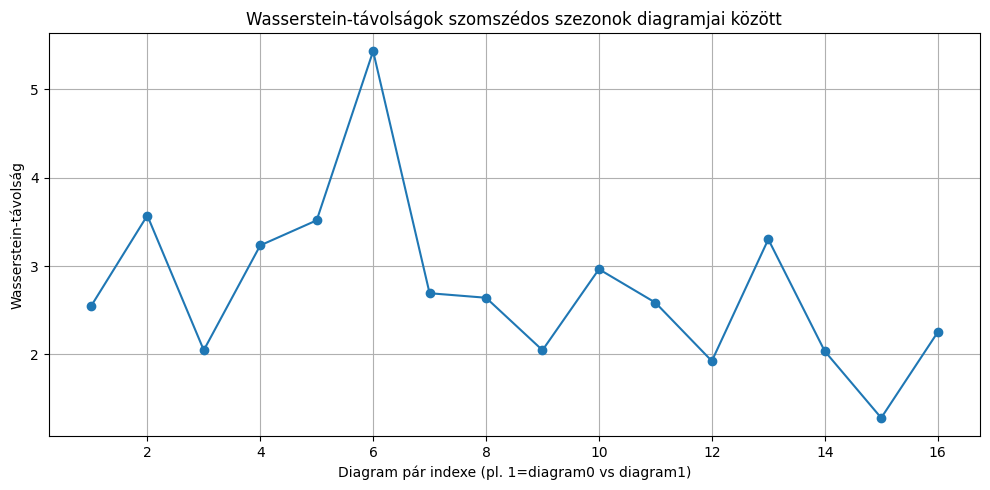

In [3]:
# BARCELONA: Inter-seasonal persitance diagrams

countable_features = ['shot_count_per_90_agg',
   'goal_count_per_90_agg', 'xG_per_90_agg', 'on_target_per_90_agg', 'pass_count_per_90_agg', 'successfull_pass_count_per_90_agg',
   'assists_per_90_agg', 'key_passes_per_90_agg', 'xA_per_90_agg', 'dribble_count_per_90_agg', 'successfull_dribbles_per_90_agg',
   'long_carries_per_90_agg', 'foul_committed_count_per_90_agg', 'fouls_suffered_count_per_90_agg',
   'penalites_won_per_90_agg', 'duel_count_per_90_agg', 'won_duels_per_90_agg', 'ball_recovery_count_per_90_agg',
   'dispossessed_count_per_90_agg', 'clearance_count_per_90_agg', 'interception_count_per_90_agg',
   'block_count_per_90_agg', 'tackle_count_per_90_agg', 'successful_tackles_per_90_agg', 'pressure_count_per_90_agg']
attackingStats = ['shot_count_per_90_agg', 'goal_count_per_90_agg', 'xG_per_90_agg', 'on_target_per_90_agg', 'key_passes_per_90_agg', 'xA_per_90_agg', 'dribble_count_per_90_agg', 'successfull_dribbles_per_90_agg'];

possessionStats = ['pass_count_per_90_agg', 'successfull_pass_count_per_90_agg'];

defensiveStats = ['duel_count_per_90_agg', 'won_duels_per_90_agg', 'tackle_count_per_90_agg', 'successful_tackles_per_90_agg', 'pressure_count_per_90_agg', 'ball_recovery_count_per_90_agg', 'interception_count_per_90_agg'];

physicalStats = ['foul_committed_count_per_90_agg', 'fouls_suffered_count_per_90_agg'];

feature_list = [
    'goal_count_per_90_agg',          
    'xG_per_90_agg',                  
    'key_passes_per_90_agg',          

    'pass_count_per_90_agg',          
    'successfull_pass_count_per_90_agg',  
    'xA_per_90_agg',                  

    'won_duels_per_90_agg',           
    'successful_tackles_per_90_agg',  
    'interception_count_per_90_agg',  

    'foul_committed_count_per_90_agg',  
    'fouls_suffered_count_per_90_agg',  
    'pressure_count_per_90_agg'        
]
selected_features = physicalStats
features = "Physical"

diagrams = []


for i in range(0,17):
    df = pd.read_csv(f"BarcelonaSeasons/{i+1}/{i+1}_season_stats_per_90.csv")  # Adatok beolvasása
    df = df[df['minutes_played'] >= 300]
    df

    output_dir = f"BarcelonaSeasons/{features}_features"
    os.makedirs(output_dir, exist_ok=True)
    
    data_TDA = df[selected_features].to_numpy()
    
    rips_complex = gd.RipsComplex(points=data_TDA, max_edge_length=1000.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=4)
    
    diag = simplex_tree.persistence()
    
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(0)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Barcelona {2003 + i}-{2004 + i} - {features} features')
    plt.show()

    diagrams.append(persistence_intervals)

distances = []
for i in range(len(diagrams) - 1):
    d1 = np.array(diagrams[i])
    d2 = np.array(diagrams[i + 1])
    dist = wasserstein_distance(d1, d2, order=1., internal_p=2.)
    distances.append(dist)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(distances) + 1), distances, marker='o', linestyle='-')
plt.title('Wasserstein-távolságok szomszédos szezonok diagramjai között')
plt.xlabel('Diagram pár indexe (pl. 1=diagram0 vs diagram1)')
plt.ylabel('Wasserstein-távolság')
plt.grid(True)
# plt.savefig(f'{output_dir}/BarcelonaSeason_0Wassersteain-{features}_features.pdf', format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

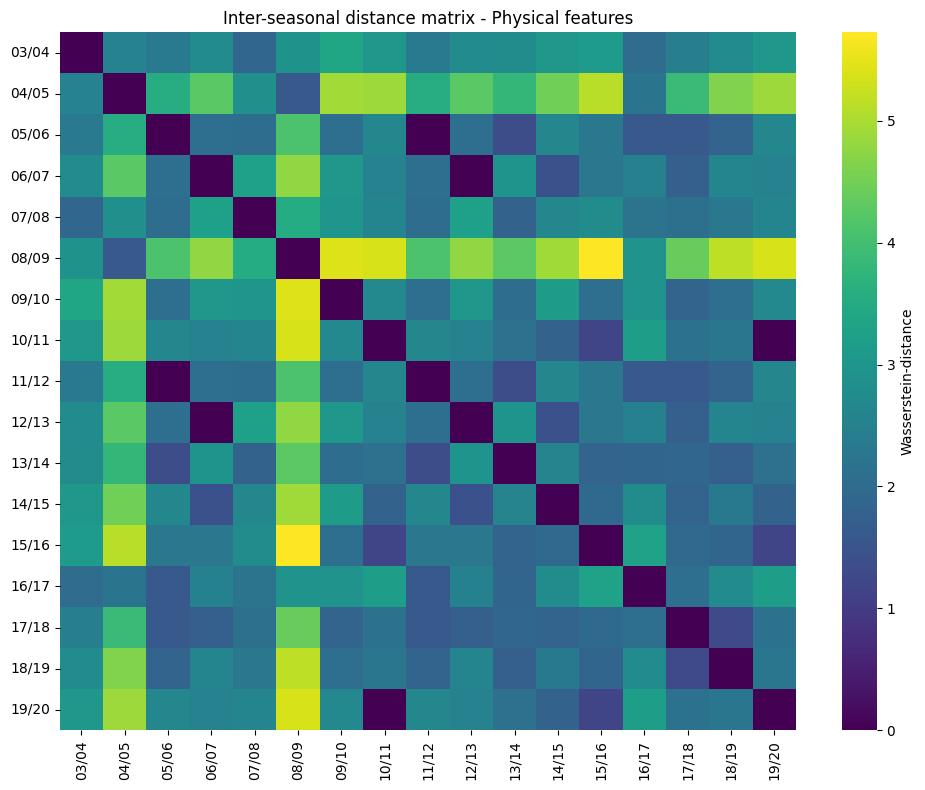

In [4]:
# BARCELONA: Inter-seasonal distance matrix

n = len(diagrams)
distance_matrix = np.zeros((n, n))

for i in range(n):
    d1 = np.array(diagrams[i])
    for j in range(i + 1, n):  
        d2 = np.array(diagrams[j])
        dist = wasserstein_distance(d1, d2, order=1., internal_p=2.)
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist 

labels = [f'{(2003 + i) % 100:02d}/{(2004 + i) % 100:02d}' for i in range(n)]
df = pd.DataFrame(distance_matrix, index=labels, columns=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=False, cmap='viridis', cbar_kws={'label': 'Wasserstein-distance'})
plt.title(f'Inter-seasonal distance matrix - {features} features')
plt.tight_layout()
# plt.savefig(f'{output_dir}/BarcelonaSeasons_distance_matrix-{features}_features.pdf', format="pdf", bbox_inches="tight")
plt.show()

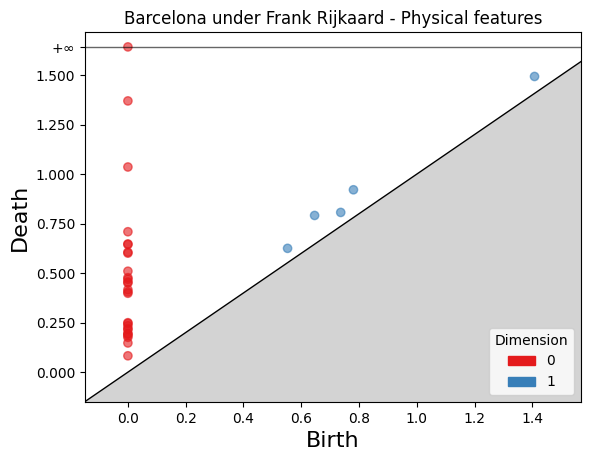

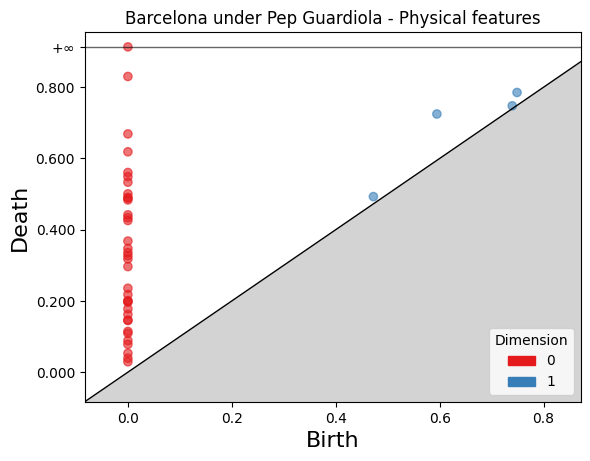

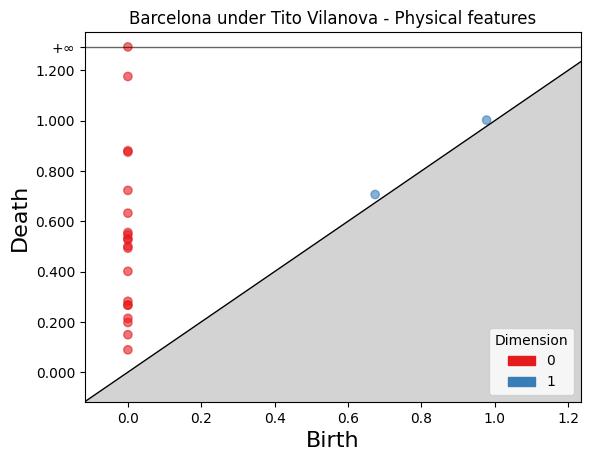

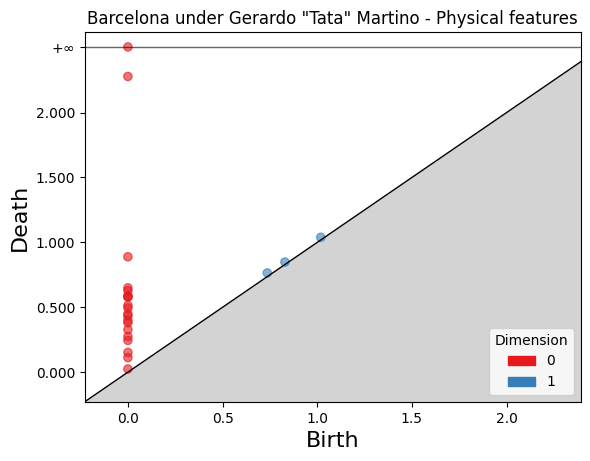

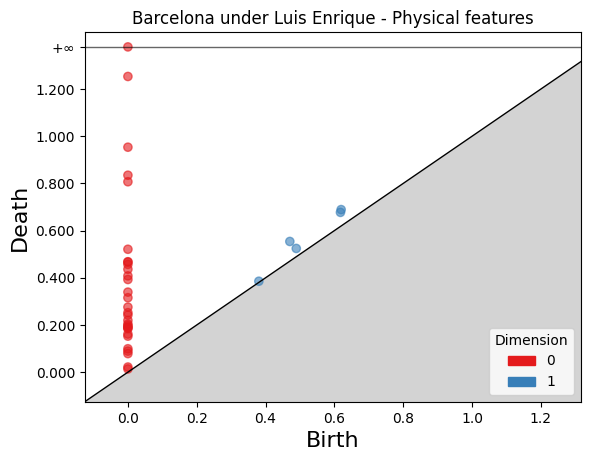

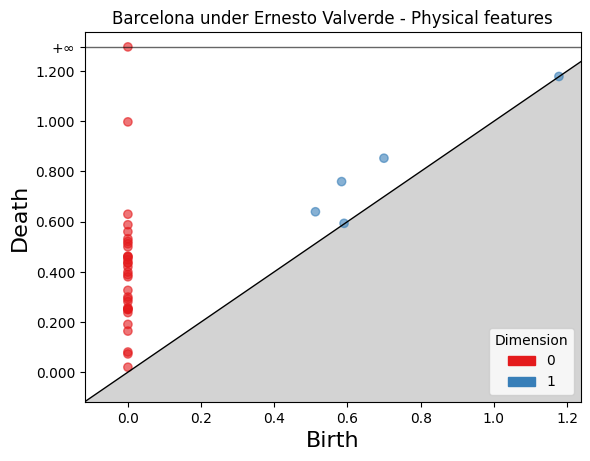

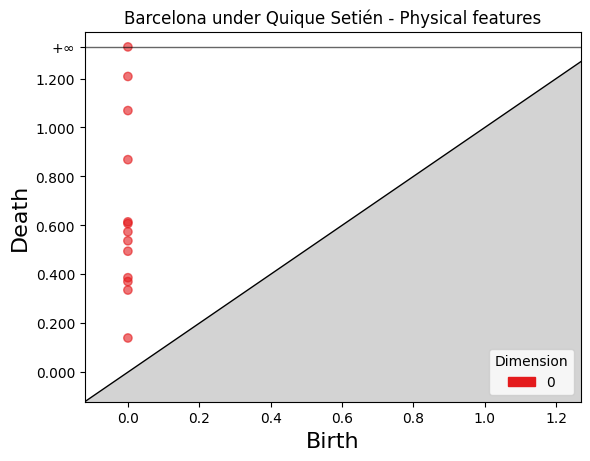

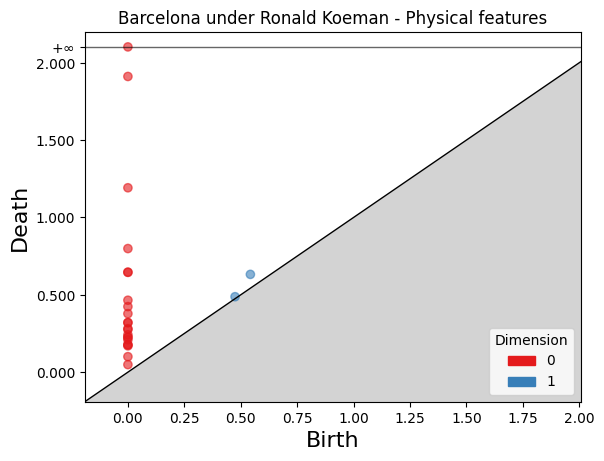

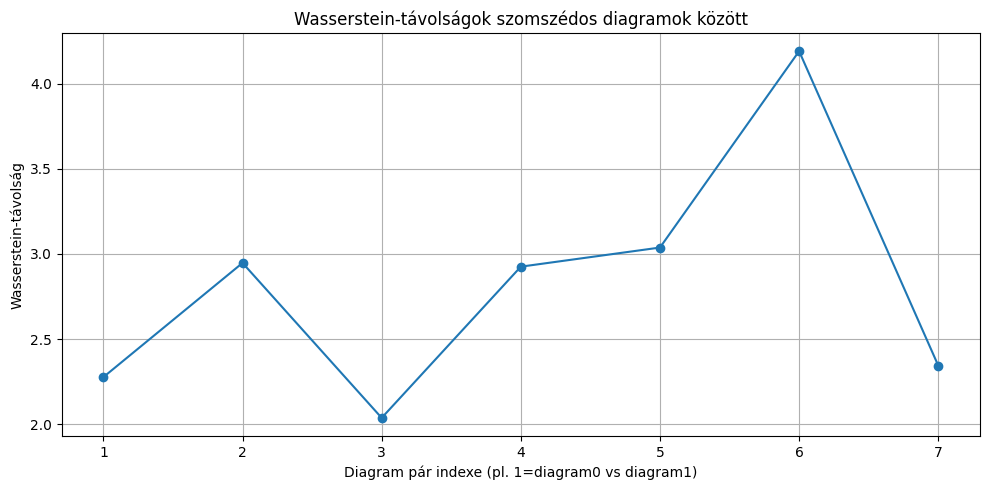

In [5]:
# BARCELONA: Inter-coach persitance diagrams

barca_managers = [
    "Frank Rijkaard",
    "Pep Guardiola",
    "Tito Vilanova",
    'Gerardo "Tata" Martino',
    "Luis Enrique",
    "Ernesto Valverde",
    "Quique Setién",
    "Ronald Koeman"
]

countable_features = ['shot_count_per_90_agg',
   'goal_count_per_90_agg', 'xG_per_90_agg', 'on_target_per_90_agg', 'pass_count_per_90_agg', 'successfull_pass_count_per_90_agg',
   'assists_per_90_agg', 'key_passes_per_90_agg', 'xA_per_90_agg', 'dribble_count_per_90_agg', 'successfull_dribbles_per_90_agg',
   'long_carries_per_90_agg', 'foul_committed_count_per_90_agg', 'fouls_suffered_count_per_90_agg',
   'penalites_won_per_90_agg', 'duel_count_per_90_agg', 'won_duels_per_90_agg', 'ball_recovery_count_per_90_agg',
   'dispossessed_count_per_90_agg', 'clearance_count_per_90_agg', 'interception_count_per_90_agg',
   'block_count_per_90_agg', 'tackle_count_per_90_agg', 'successful_tackles_per_90_agg', 'pressure_count_per_90_agg']
attackingStats = ['shot_count_per_90_agg', 'goal_count_per_90_agg', 'xG_per_90_agg', 'on_target_per_90_agg', 'key_passes_per_90_agg', 'xA_per_90_agg', 'dribble_count_per_90_agg', 'successfull_dribbles_per_90_agg'];

possessionStats = ['pass_count_per_90_agg', 'successfull_pass_count_per_90_agg'];

defensiveStats = ['duel_count_per_90_agg', 'won_duels_per_90_agg', 'tackle_count_per_90_agg', 'successful_tackles_per_90_agg', 'pressure_count_per_90_agg', 'ball_recovery_count_per_90_agg', 'interception_count_per_90_agg'];

physicalStats = ['foul_committed_count_per_90_agg', 'fouls_suffered_count_per_90_agg'];

feature_list = [
    'goal_count_per_90_agg',          
    'xG_per_90_agg',                  
    'key_passes_per_90_agg',          

    'pass_count_per_90_agg',          
    'successfull_pass_count_per_90_agg',  
    'xA_per_90_agg',                  

    'won_duels_per_90_agg',           
    'successful_tackles_per_90_agg',  
    'interception_count_per_90_agg',  

    'foul_committed_count_per_90_agg',  
    'fouls_suffered_count_per_90_agg',  
    'pressure_count_per_90_agg'        
]
selected_features = physicalStats
features = "Physical"

diagrams = []
for i in range(0,8):
    df = pd.read_csv(f"BarcelonaCoaches/{i+1}/{i+1}_coach_stats_per_90.csv")  # Adatok beolvasása
    df = df[df['minutes_played'] >= 300]
    df

    output_dir = f"BarcelonaCoaches/{features}_features"
    os.makedirs(output_dir, exist_ok=True)
    
    #selected_features = countable_features
    data_TDA = df[selected_features].to_numpy()
    
    rips_complex = gd.RipsComplex(points=data_TDA, max_edge_length=1000.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=4)
    
    diag = simplex_tree.persistence()
    
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(0)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Barcelona under {barca_managers[i]} - {features} features')
    # plt.savefig(f'{output_dir}/BarcelonaCoaches_{i+1}_persistence_diagram-{features}_features.pdf', format="pdf", bbox_inches="tight")
    plt.show()
    
    diagrams.append(persistence_intervals)

distances = []
for i in range(len(diagrams) - 1):
    d1 = np.array(diagrams[i])
    d2 = np.array(diagrams[i + 1])
    dist = wasserstein_distance(d1, d2)
    distances.append(dist)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(distances) + 1), distances, marker='o', linestyle='-')
plt.title('Wasserstein-távolságok szomszédos diagramok között')
plt.xlabel('Diagram pár indexe (pl. 1=diagram0 vs diagram1)')
plt.ylabel('Wasserstein-távolság')
plt.grid(True)
# plt.savefig(f'{output_dir}/BarcelonaCoaches_0Wassersteain-{features}_features.pdf', format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

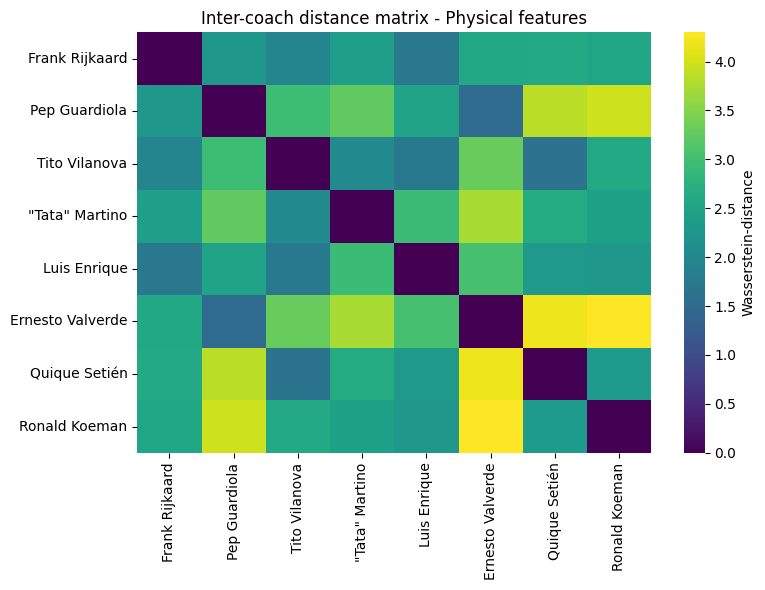

In [7]:
# BARCELONA: Inter-coach distance matrix

n = len(diagrams)
distance_matrix = np.zeros((n, n))

for i in range(n):
    d1 = np.array(diagrams[i])
    for j in range(i + 1, n):  # csak a felső háromszögön számolunk
        d2 = np.array(diagrams[j])
        dist = wasserstein_distance(d1, d2)
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist  # szimmetrikus mátrix

barca_managers = [
    "Frank Rijkaard",
    "Pep Guardiola",
    "Tito Vilanova",
    '"Tata" Martino',
    "Luis Enrique",
    "Ernesto Valverde",
    "Quique Setién",
    "Ronald Koeman"
]
df = pd.DataFrame(distance_matrix, index=barca_managers, columns=barca_managers)

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=False, cmap='viridis', cbar_kws={'label': 'Wasserstein-distance'})
plt.title(f'Inter-coach distance matrix - {features} features')
plt.tight_layout()
# plt.savefig(f'{output_dir}/Barcelona_distance_matrix-{features}_features.pdf', format="pdf", bbox_inches="tight")
plt.show()